# Q1

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import ssl
from keras.utils import to_categorical
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# loading in the MNIST dataset for Q1
# Obtaining the CIFAR-10 dataset for the implementation for both training and testing data using built-in functions
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_test = x_test.astype('float32') / 255

# target column
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

The models that goes through the iteration for so long that I printed out the model accuracy so you can see that it runs without having to run it yourself. If you want, you can do that as well. It takes approximately 45 mins for each.

In [3]:
# iterating parameters for all the models
learning_rate = [0.001, 0.01, 0.1]
batch_size = [25, 50, 100]
optimizer_choice = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD, tf.keras.optimizers.RMSprop]

In [4]:
a = []
d = []
c = []
e = []

# define the model for the convolutional neural net for INCREASING filters
for lr in learning_rate:
    for bs in batch_size:
        for oc in optimizer_choice:
            # Training the layers for the CNN using Keras
            # The three convolutional layers
            model = tf.keras.models.Sequential()
            model.add(tf.keras.layers.Conv2D(2, (3, 3), kernel_initializer='he_uniform', activation='relu', input_shape=(28, 28, 1)))
            model.add(tf.keras.layers.Conv2D(4, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(8, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(24, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(48, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(86, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(92, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

            # Flatten the convulational layers and add the dense layers with 84 neurons and the relu activation
            # and the output layer with the softmax output layer with 10 nominal output.
            model.add(tf.keras.layers.Flatten())
            model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform')) # layer 9
            model.add(tf.keras.layers.Dense(10, activation='softmax')) # layer 10

            # Compile
            opt = oc(learning_rate = lr)
            model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

            # Fit the training data to the model
            NNmodel = model.fit(x_train, y_train, batch_size=bs, epochs=10, validation_data=(x_test, y_test))

            # lists
            a.append(lr)
            d.append(bs)
            c.append(oc)
            e.append(model.evaluate(x_test, y_test)[1])

models1 = pd.DataFrame({'Learning Rate': a,
                        'Batch Size': d,
                        'Optimizer': c,
                        'Accuracy': e})

Epoch 1/10
2400/2400 [==============================] - 17s 6ms/step - loss: 0.2244 - accuracy: 0.9302 - val_loss: 0.0881 - val_accuracy: 0.9719
Epoch 2/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.0739 - accuracy: 0.9775 - val_loss: 0.0502 - val_accuracy: 0.9841
Epoch 3/10
2400/2400 [==============================] - 16s 7ms/step - loss: 0.0583 - accuracy: 0.9822 - val_loss: 0.0432 - val_accuracy: 0.9862
Epoch 4/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0566 - val_accuracy: 0.9833
Epoch 5/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0597 - val_accuracy: 0.9844
Epoch 6/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 7/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0438 - val_ac

In [31]:
models1.sort_values('Accuracy', ascending=False)

,Learning Rate,Batch Size,Optimizer,Accuracy
6,0.001,100,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,0.9914
3,0.001,50,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,0.9904
8,0.001,100,<class 'keras.optimizers.optimizer_v2.rmsprop....,0.9899
13,0.010,50,<class 'keras.optimizers.optimizer_v2.gradient...,0.9879
10,0.010,25,<class 'keras.optimizers.optimizer_v2.gradient...,0.9873
16,0.010,100,<class 'keras.optimizers.optimizer_v2.gradient...,0.9853
0,0.001,25,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,0.9851
5,0.001,50,<class 'keras.optimizers.optimizer_v2.rmsprop....,0.9850
25,0.100,100,<class 'keras.optimizers.optimizer_v2.gradient...,0.9829
1,0.001,25,<class 'keras.optimizers.optimizer_v2.gradient...,0.9816


In [6]:
a = []
d = []
c = []
e = []

# define the model for the convolutional neural net for REDUCING filters
for lr in learning_rate:
    for bs in batch_size:
        for oc in optimizer_choice:
            # Training the layers for the CNN using Keras
            # # The three convolutional layers
            model = tf.keras.models.Sequential()
            model.add(tf.keras.layers.Conv2D(92, (3, 3), kernel_initializer='he_uniform', activation='relu', input_shape=(28, 28, 1)))
            model.add(tf.keras.layers.Conv2D(86, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(48, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(24, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(8, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(4, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(2, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

            # Flatten the convulational layers and add the dense layers with 84 neurons and the relu activation
            # and the output layer with the softmax output layer with 10 nominal output.
            model.add(tf.keras.layers.Flatten())
            model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform')) # layer 9
            model.add(tf.keras.layers.Dense(10, activation='softmax')) # layer 10

            # Compile
            opt = oc(learning_rate = lr)
            model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

            # Fit the training data to the model
            NNmodel = model.fit(x_train, y_train, batch_size=bs, epochs=10, validation_data=(x_test, y_test))

            # lists
            a.append(lr)
            d.append(bs)
            c.append(oc)
            e.append(model.evaluate(x_test, y_test)[1])

models2 = pd.DataFrame({'Learning Rate': a,
                        'Batch Size': d,
                        'Optimizer': c,
                        'Accuracy': e})


Epoch 1/10
2400/2400 [==============================] - 19s 8ms/step - loss: 0.4789 - accuracy: 0.8531 - val_loss: 0.1939 - val_accuracy: 0.9431
Epoch 2/10
2400/2400 [==============================] - 18s 8ms/step - loss: 0.1821 - accuracy: 0.9465 - val_loss: 0.1376 - val_accuracy: 0.9592
Epoch 3/10
2400/2400 [==============================] - 18s 8ms/step - loss: 0.1338 - accuracy: 0.9600 - val_loss: 0.1283 - val_accuracy: 0.9600
Epoch 4/10
2400/2400 [==============================] - 18s 8ms/step - loss: 0.1098 - accuracy: 0.9671 - val_loss: 0.0998 - val_accuracy: 0.9717
Epoch 5/10
2400/2400 [==============================] - 18s 7ms/step - loss: 0.0936 - accuracy: 0.9719 - val_loss: 0.1046 - val_accuracy: 0.9699
Epoch 6/10
2400/2400 [==============================] - 18s 8ms/step - loss: 0.0817 - accuracy: 0.9758 - val_loss: 0.0797 - val_accuracy: 0.9752
Epoch 7/10
2400/2400 [==============================] - 18s 7ms/step - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.0851 - val_ac

In [30]:
models2.sort_values('Accuracy', ascending=False)

,Learning Rate,Batch Size,Optimizer,Accuracy
3,0.001,50,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,0.9849
10,0.010,25,<class 'keras.optimizers.optimizer_v2.gradient...,0.9839
8,0.001,100,<class 'keras.optimizers.optimizer_v2.rmsprop....,0.9838
16,0.010,100,<class 'keras.optimizers.optimizer_v2.gradient...,0.9816
0,0.001,25,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,0.9808
6,0.001,100,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,0.9806
5,0.001,50,<class 'keras.optimizers.optimizer_v2.rmsprop....,0.9801
2,0.001,25,<class 'keras.optimizers.optimizer_v2.rmsprop....,0.9770
13,0.010,50,<class 'keras.optimizers.optimizer_v2.gradient...,0.9755
1,0.001,25,<class 'keras.optimizers.optimizer_v2.gradient...,0.9718


In [8]:
a = []
d = []
c = []
e = []

# define the model for the convolutional neural net for reducing filters
for lr in learning_rate:
    for bs in batch_size:
        for oc in optimizer_choice:
            # define the model for the convolutional neural net for HOURGLASS filters
            # Training the layers for the CNN using Keras
            # The three convolutional layers
            model = tf.keras.models.Sequential()
            model.add(tf.keras.layers.Conv2D(2, (3, 3), kernel_initializer='he_uniform', activation='relu', input_shape=(28, 28, 1)))
            model.add(tf.keras.layers.Conv2D(4, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(8, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(24, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(24, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(8, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.Conv2D(4, (3, 3), kernel_initializer='he_uniform', activation='relu'))
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

            # Flatten the convulational layers and add the dense layers with 84 neurons and the relu activation
            # and the output layer with the softmax output layer with 10 nominal output.
            model.add(tf.keras.layers.Flatten())
            model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform')) # layer 9
            model.add(tf.keras.layers.Dense(10, activation='softmax')) # layer 10

            # Compile
            opt = oc(learning_rate = lr)
            model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

            # Fit the training data to the model
            NNmodel = model.fit(x_train, y_train, batch_size=bs, epochs=10, validation_data=(x_test, y_test))

            # lists
            a.append(lr)
            d.append(bs)
            c.append(oc)
            e.append(model.evaluate(x_test, y_test)[1])

models3 = pd.DataFrame({'Learning Rate': a,
                        'Batch Size': d,
                        'Optimizer': c,
                        'Accuracy': e})

Epoch 1/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.3111 - accuracy: 0.9031 - val_loss: 0.1445 - val_accuracy: 0.9576
Epoch 2/10
2400/2400 [==============================] - 13s 6ms/step - loss: 0.1304 - accuracy: 0.9602 - val_loss: 0.1540 - val_accuracy: 0.9527
Epoch 3/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.0963 - accuracy: 0.9701 - val_loss: 0.0765 - val_accuracy: 0.9759
Epoch 4/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.0806 - accuracy: 0.9750 - val_loss: 0.1096 - val_accuracy: 0.9686
Epoch 5/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.0685 - accuracy: 0.9786 - val_loss: 0.0657 - val_accuracy: 0.9797
Epoch 6/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.0622 - val_accuracy: 0.9804
Epoch 7/10
2400/2400 [==============================] - 13s 6ms/step - loss: 0.0556 - accuracy: 0.9828 - val_loss: 0.0556 - val_ac

In [29]:
models3.sort_values('Accuracy', ascending=False)

,Learning Rate,Batch Size,Optimizer,Accuracy
5,0.001,50,<class 'keras.optimizers.optimizer_v2.rmsprop....,0.9868
8,0.001,100,<class 'keras.optimizers.optimizer_v2.rmsprop....,0.9839
0,0.001,25,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,0.9834
6,0.001,100,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,0.9834
13,0.010,50,<class 'keras.optimizers.optimizer_v2.gradient...,0.9830
2,0.001,25,<class 'keras.optimizers.optimizer_v2.rmsprop....,0.9828
10,0.010,25,<class 'keras.optimizers.optimizer_v2.gradient...,0.9821
3,0.001,50,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,0.9814
25,0.100,100,<class 'keras.optimizers.optimizer_v2.gradient...,0.9812
22,0.100,50,<class 'keras.optimizers.optimizer_v2.gradient...,0.9807


The CNNs were trained on MNIST dataset with the 10 convulutional layers using the decreasing, increasing and hourglass convulutional structures for the layers. These different neural networks were trained on mulitple parameters and iterated through learning rates of between 0.001, 0.01 and 0.1, batch sizes of 25, 50 and 100. The optimizers between tf.keras.optimizers.Adam, tf.keras.optimizers.SGD and tf.keras.optimizers.RMSprop were also iterated through. The accuracy is the 2nd value in the tables. The code somehow took too long to run so I could not clean that up. These models were passed through all the models. The first model performed the most on parameters - learning rate of 0.001, batch size of 100 and with the optimizer Adam. The second model went through the same parameters and the most accurate had learning rate of 0.001, batch size of 50 and the Adam optimizer. The funnel network performed best with the learning rate of 0.001, batch size of 50 and the RMS prop optimzer.

# Q2

In [10]:
# Obtaining the CIFAR-10 dataset for the implementation for both training and testing data using built-in functions
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = (x_train.astype('float32')) / 255.0
x_test = (x_test.astype('float32')) / 255.0

170498071/170498071 [==============================] - 14s 0us/step


In [11]:
# define empty lists to store the accuracy and loss values for model comparison
loss = []
lossv = []
accuracy = []
accuracyv = []
learning_rate = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rate:
    # Training the layers for the CNN using Keras
    # The three convolutional layers
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(6, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(120, (5, 5), activation='relu', kernel_initializer='he_uniform'))
    
    # Flatten the convulational layers and add the dense layers with 84 neurons and the relu activation
    # and the output layer with the softmax output layer with 10 nominal output.
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # Compile
    opt = tf.keras.optimizers.Adam(learning_rate = lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Fit the training data to the model
    NNmodel = model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test, y_test))

    accuracyv.append((NNmodel.history['val_accuracy'])[-1])
    accuracy.append((NNmodel.history['accuracy'])[-1])
    lossv.append((NNmodel.history['val_loss'])[-1])
    loss.append((NNmodel.history['loss'])[-1])

Epoch 1/25
782/782 [==============================] - 5s 5ms/step - loss: 1.9753 - accuracy: 0.2866 - val_loss: 1.7642 - val_accuracy: 0.3766
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 1.6941 - accuracy: 0.3994 - val_loss: 1.6326 - val_accuracy: 0.4184
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5843 - accuracy: 0.4365 - val_loss: 1.5571 - val_accuracy: 0.4413
Epoch 4/25
782/782 [==============================] - 4s 5ms/step - loss: 1.5199 - accuracy: 0.4567 - val_loss: 1.5019 - val_accuracy: 0.4554
Epoch 5/25
782/782 [==============================] - 4s 5ms/step - loss: 1.4734 - accuracy: 0.4758 - val_loss: 1.4699 - val_accuracy: 0.4688
Epoch 6/25
782/782 [==============================] - 4s 4ms/step - loss: 1.4345 - accuracy: 0.4860 - val_loss: 1.4305 - val_accuracy: 0.4837
Epoch 7/25
782/782 [==============================] - 4s 5ms/step - loss: 1.4033 - accuracy: 0.4984 - val_loss: 1.4161 - val_accuracy: 0.4908
Epoch 

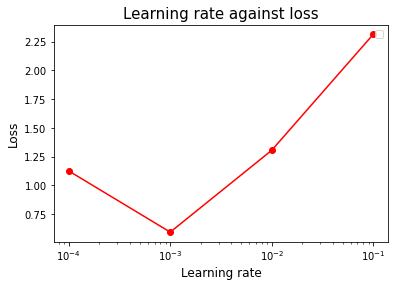

In [12]:
# learning rate against loss plot
# using a log plot since the learning rate values are far apart and it looks weird.
plt.scatter(learning_rate, loss, color ='red') 
plt.plot(learning_rate, loss, color ='red') 
plt.legend() 
plt.title("Learning rate against loss", fontsize=15) 
plt.ylabel('Loss', fontsize = 12) 
plt.xlabel('Learning rate', fontsize = 12) 
plt.xscale("log")
plt.show()

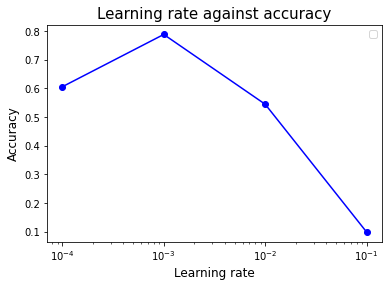

In [13]:
# learning rate against accuracy plot
plt.scatter(learning_rate, accuracy, color ='blue') 
plt.plot(learning_rate, accuracy, color ='blue') 
plt.legend() 
plt.title("Learning rate against accuracy", fontsize=15) 
plt.ylabel('Accuracy', fontsize = 12) 
plt.xlabel('Learning rate', fontsize = 12) 
plt.xscale("log")
plt.show()

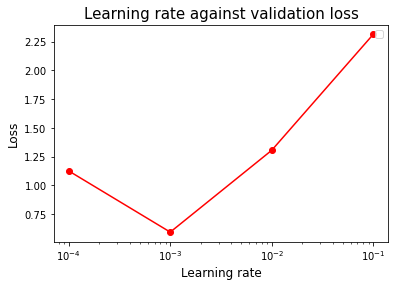

In [14]:
# learning rate against loss plot
# using a log plot since the learning rate values are far apart and it looks weird.
plt.scatter(learning_rate, loss, color ='red') 
plt.plot(learning_rate, loss, color ='red') 
plt.legend() 
plt.title("Learning rate against validation loss", fontsize=15) 
plt.ylabel('Loss', fontsize = 12) 
plt.xlabel('Learning rate', fontsize = 12) 
plt.xscale("log")
plt.show()

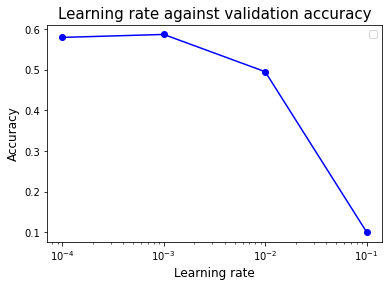

In [15]:
# learning rate against accuracy plot
plt.scatter(learning_rate, accuracyv, color ='blue') 
plt.plot(learning_rate, accuracyv, color ='blue') 
plt.legend() 
plt.title("Learning rate against validation accuracy", fontsize=15) 
plt.ylabel('Accuracy', fontsize = 12) 
plt.xlabel('Learning rate', fontsize = 12) 
plt.xscale("log")
plt.show()

1. The effect of the learning was tested with 4 different learning rates. 0.0001, 0.001, 0.01 and 0.1. Increasing the learning rate from 0.0001 to 0.001 reduced the loss of the training and increased the accuracy of the training process. However, a further increase in the learning rate threw the model completely off. The loss rose to about 2.25 and the accuracy dropped to 0.1 which is extremely bad. The best performing learning rate was 0.001 with the lowest loss and highest accuracy.

In [16]:
# define empty lists to store the accuracy and loss values for model comparison
loss = []
lossv = []
accuracy = []
accuracyv = []
batch_size = [25, 50, 100, 150, 200]

# Training the layers for the CNN using Keras
# The three convolutional layers
for bs in batch_size:
    # Training the layers for the CNN using Keras
    # The three convolutional layers
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(6, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(120, (5, 5), activation='relu', kernel_initializer='he_uniform'))

    # Flatten the convulational layers and add the dense layers with 84 neurons and the relu activation
    # and the output layer with the softmax output layer with 10 nominal output.
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # Compile
    opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Fit the training data to the model
    NNmodel = model.fit(x_train, y_train, batch_size=bs, epochs=25, validation_data=(x_test, y_test))

    accuracyv.append((NNmodel.history['val_accuracy'])[-1])
    accuracy.append((NNmodel.history['accuracy'])[-1])
    lossv.append((NNmodel.history['val_loss'])[-1])
    loss.append((NNmodel.history['loss'])[-1])

Epoch 1/25
2000/2000 [==============================] - 9s 4ms/step - loss: 1.5903 - accuracy: 0.4229 - val_loss: 1.3552 - val_accuracy: 0.5177
Epoch 2/25
2000/2000 [==============================] - 7s 4ms/step - loss: 1.2955 - accuracy: 0.5413 - val_loss: 1.2662 - val_accuracy: 0.5469
Epoch 3/25
2000/2000 [==============================] - 9s 4ms/step - loss: 1.1839 - accuracy: 0.5808 - val_loss: 1.1761 - val_accuracy: 0.5861
Epoch 4/25
2000/2000 [==============================] - 8s 4ms/step - loss: 1.1108 - accuracy: 0.6090 - val_loss: 1.1948 - val_accuracy: 0.5767
Epoch 5/25
2000/2000 [==============================] - 7s 4ms/step - loss: 1.0463 - accuracy: 0.6302 - val_loss: 1.1433 - val_accuracy: 0.5973
Epoch 6/25
2000/2000 [==============================] - 8s 4ms/step - loss: 0.9983 - accuracy: 0.6460 - val_loss: 1.1089 - val_accuracy: 0.6185
Epoch 7/25
2000/2000 [==============================] - 8s 4ms/step - loss: 0.9488 - accuracy: 0.6660 - val_loss: 1.0932 - val_accuracy:

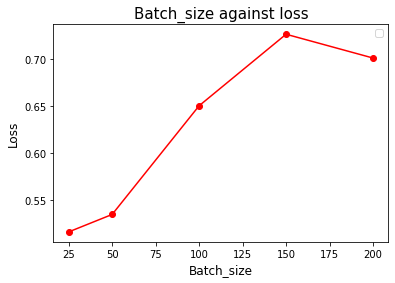

In [17]:
# Batch_size against loss plot
plt.scatter(batch_size, loss, color ='red') 
plt.plot(batch_size, loss, color ='red') 
plt.legend() 
plt.title("Batch_size against loss", fontsize=15) 
plt.ylabel('Loss', fontsize = 12) 
plt.xlabel('Batch_size', fontsize = 12) 
plt.show()

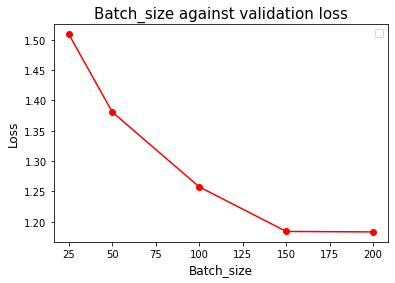

In [18]:
# Batch_size against loss plot
plt.scatter(batch_size, lossv, color ='red') 
plt.plot(batch_size, lossv, color ='red') 
plt.legend() 
plt.title("Batch_size against validation loss", fontsize=15) 
plt.ylabel('Loss', fontsize = 12) 
plt.xlabel('Batch_size', fontsize = 12) 
plt.show()

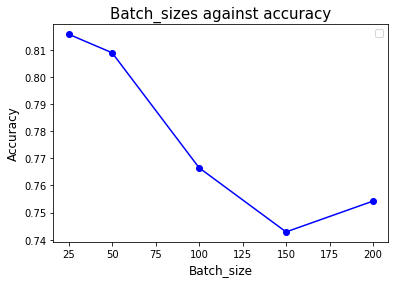

In [19]:
# Batch_size against accuracy plot
plt.scatter(batch_size, accuracy, color ='blue') 
plt.plot(batch_size, accuracy, color ='blue') 
plt.legend() 
plt.title("Batch_sizes against accuracy", fontsize=15) 
plt.ylabel('Accuracy', fontsize = 12) 
plt.xlabel('Batch_size', fontsize = 12) 
plt.show()

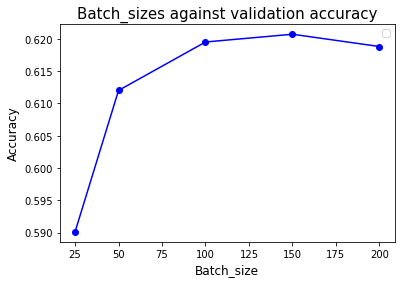

In [20]:
# Batch_size against accuracy plot
plt.scatter(batch_size, accuracyv, color ='blue') 
plt.plot(batch_size, accuracyv, color ='blue') 
plt.legend() 
plt.title("Batch_sizes against validation accuracy", fontsize=15) 
plt.ylabel('Accuracy', fontsize = 12) 
plt.xlabel('Batch_size', fontsize = 12) 
plt.show()

2. The batch size was also tested against the training loss and accuracy. This was also done for batch sizes of 25, 50, 100, 150, 200 and 500. Increasing the batch size increases the training loss and reduces the training accuracy. however, as a side note, the validation accuracy increasing to a point before dropping again. Considering all of these, I would say the best performing batch size for this particular model would probably be a batch size of 50.

In [21]:
a = []
d = []
e = []

# define the model for the convolutional neural net for reducing filters
for lr in learning_rate:
    for bs in batch_size:
        # Training the layers for the CNN using Keras
        # The three convolutional layers

        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Conv2D(6, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
        model.add(tf.keras.layers.Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_uniform'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
        model.add(tf.keras.layers.Conv2D(120, (5, 5), activation='relu', kernel_initializer='he_uniform'))

        # Flatten the convulational layers and add the dense layers with 84 neurons and the relu activation
        # and the output layer with the softmax output layer with 10 nominal output.
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(84, activation='relu', kernel_initializer='he_uniform'))
        model.add(tf.keras.layers.Dense(10, activation='softmax'))

        # Compile
        opt = tf.keras.optimizers.Adam(learning_rate = lr)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

        # Fit the training data to the model
        NNmodel = model.fit(x_train, y_train, batch_size=bs, epochs=10, validation_data=(x_test, y_test))

        # lists
        a.append(lr)
        d.append(bs)
        e.append(model.evaluate(x_test, y_test)[1])

models4 = pd.DataFrame({'Learning Rate': a,
                        'Batch Size': d,
                        'Accuracy': e})

        

Epoch 1/10
2000/2000 [==============================] - 9s 4ms/step - loss: 1.8638 - accuracy: 0.3247 - val_loss: 1.6607 - val_accuracy: 0.4017
Epoch 2/10
2000/2000 [==============================] - 9s 5ms/step - loss: 1.5826 - accuracy: 0.4284 - val_loss: 1.5598 - val_accuracy: 0.4373
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 1.4853 - accuracy: 0.4676 - val_loss: 1.4534 - val_accuracy: 0.4742
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 1.4278 - accuracy: 0.4894 - val_loss: 1.4132 - val_accuracy: 0.4914
Epoch 5/10
2000/2000 [==============================] - 7s 4ms/step - loss: 1.3830 - accuracy: 0.5070 - val_loss: 1.3801 - val_accuracy: 0.5048
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 1.3469 - accuracy: 0.5188 - val_loss: 1.3496 - val_accuracy: 0.5183
Epoch 7/10
2000/2000 [==============================] - 7s 4ms/step - loss: 1.3154 - accuracy: 0.5325 - val_loss: 1.3308 - val_accuracy:

In [28]:
models4.sort_values('Accuracy', ascending=False)

,Learning Rate,Batch Size,Accuracy
6,0.0010,50,0.6245
7,0.0010,100,0.6112
5,0.0010,25,0.6015
8,0.0010,150,0.5860
9,0.0010,200,0.5852
0,0.0001,25,0.5471
1,0.0001,50,0.5422
3,0.0001,150,0.5012
2,0.0001,100,0.4992
14,0.0100,200,0.4804


3. Using the different parameters in the model to obtain the best accuracy would be employing the best batch size and best learning rate as found. This is with a batch size of 50 and a learning rate of 0.001

In [23]:
# feed forward neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(32, 32, 3), name='Input-Layer'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(120, activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.build(input_shape=(32, 32, 3))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

NNmodel = model.fit(x_train, y_train, batch_size=500, epochs=25, verbose=1)

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 32, 32, 6)         24        
                                                                 
 dense_221 (Dense)           (None, 32, 32, 16)        112       
                                                                 
 dense_222 (Dense)           (None, 32, 32, 120)       2040      
                                                                 
 flatten_110 (Flatten)       (None, 122880)            0         
                                                                 
 dense_223 (Dense)           (None, 84)                10322004  
                                                                 
 dense_224 (Dense)           (None, 10)                850       
                                                                 
Total params: 10,325,030
Trainable params: 10,325,03

In [24]:
# evaluate model
model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 2s 4ms/step - loss: 1.6648 - accuracy: 0.3905


0.390500009059906

a. The performance had an accuracy of 0.3905

b. The parameters involved in the network model were 10,325,030.

# Q3

For the question 3, I solved it by hand and attached it here under this particular text. however, for some reason, it is not showing here in the colab. I will add a markdown file in my github repository and link it in the submission as a comment.

![](20221024_110928.jpg)
![](20221024_111000.jpg)